 scikit-learn对数据集的处理

Scikit-learn处理数据集包括对特征的编码、数据集的切分与打乱等操作，并且自带了一部分数据集。对特征的编码与处理是做好后续操作的关键。

首先是特征编码的部分。机器学习算法无法直接处理字符串数据，所以，需要给离散属性进行特征编码保证它们是独立的。常用函数如下

OneHotEncoder: 输入参数包括data（数据），categories（指定哪些是有效类别）。输出独热编码后的数据，返回值类型取决于输入数据和参数的设置。如果sparse为True，则返回稀疏矩阵；如果为False或未设置，则返回密集矩阵。它的作用是对目标变量进行独热编码，将每个类别转换为一个二进制列向量。

LabelEncoder: 输入参数包括data（标签数组或列表）。输出参数为转换后的整数标签数组。它的作用是将标签转换为整数，标签会按照出现顺序进行排序并分配整数。未出现的标签将被编码为-1。

LabelBinarizer: 输入参数包括data（标签数组或列表）。输出参数为二进制形式的标签矩阵，每一行代表一个样本，每一列代表一个标签。如果标签出现在样本中，则对应位置为1；否则为0。它的作用是将标签转换为二进制形式，适合于多标签分类问题。

MinMaxScaler: 输入参数包括data（特征数组或列表）和可选参数feature_range（一个元组，指定缩放后的范围，例如(0, 1)）。输出参数为缩放后的特征数组，每个特征的值都将在指定的范围内。它的作用是对特征进行min-max规约化，将每个特征的值缩放到指定的范围。

StandardScaler: 输入参数包括data（特征数组或列表），以及可选参数with_mean（布尔值，默认为True）和with_std（布尔值，默认为True）。输出参数为标准化后的特征数组，每个特征都减去其均值并除以其标准差。它的作用是对特征进行Z-score规约化。

CountVectorizer: 输入参数包括data（文本数据）和可选参数参数如stop_words（停用词列表），max_df（最大文档频率），min_df（最小文档频率）等。输出参数为词频矩阵，其中每一行代表一个样本，每一列代表一个词，矩阵中的元素表示该词在对应样本中出现的次数。它的作用是将文本数据转换为词频矩阵，方便后续的机器学习算法使用。

TfidfVectorizer: 输入参数包括data（文本数据）和可选参数参数如stop_words（停用词列表），max_df（最大文档频率），min_df（最小文档频率）等。输出参数为TF-IDF矩阵，其中每一行代表一个样本，每一列代表一个词，矩阵中的元素表示该词在对应样本中的TF-IDF值。它的作用是将文本数据转换为TF-IDF矩阵，方便后续的机器学习算法使用。与CountVectorizer不同的是，它同时考虑了词频和逆文档频率，能够更好地反映词语在文本中的重要性。

特征工程是指通过一系列算法和技巧，将原始数据转换为能够被机器学习模型理解和使用的特征的过程。特征工程是机器学习中至关重要的步骤，因为机器学习模型的效果在很大程度上取决于输入特征的质量和数量。通过特征工程，可以提取出更具有代表性和区分度的特征，从而提高模型的准确率和泛化能力。特征工程可以帮助解决数据维度过高、特征相关性、缺失值等问题，同时也可以根据业务背景和经验知识，加入一些手工特征或特征组合，以提升模型效果。对于特征的构造，需要利用一些背景知识和数学方法。但对于特征的选择，则有一些统计方法可以参考。

    基于特征自身的方差。我们知道，在构建回归方程的时候如果有一列数据都是同一个值，它并不会对结果造成什么太大的影响，而是充当方程的常数项。这是一个特征的极限情况。事实上，如果一个特征的波动情况不大，方差过小的情况下它的影响是非常小的。
    基于特征与标签的统计结果。通过T检验、卡方检验、方差检验和相关系数等统计量可以分析某个特征的取值不同是否会造成标签出现明显差异，或者说，标签不同的多组样本它们在某个属性上是否呈现出显著的水平差异。
    基于机器学习模型的分析。一些树模型例如决策树、随机森林、XGBoost等方法可以给不同的特征以权重分数，按照权重分数从高到低排序即可得到特征的重要性顺序。这样就可以选出最重要的特征。

Scikit-learn中提供了一些特征选择与交叉验证的函数：

    RFECV: 输入参数包括estimator（估计器对象，已经训练的模型），data（数据集），param_grid（参数网格），cv（交叉验证的折数）。输出参数为最佳特征子集。它的作用是通过递归特征消除来选择最佳的特征子集，通过在交叉验证过程中逐步删除最不重要的特征来找到最优特征集。
    SelectKBest: 输入参数包括data（数据集），key（特征选择方法，如卡方检验或互信息法），k（要选择的特征数量）。输出参数为选择后的特征矩阵。它的作用是使用卡方检验或互信息法来选择最佳特征，通过计算特征与目标变量之间的相关性来选择最有用的特征。
    SelectPercentile: 输入参数包括data（数据集），percentile（要选择的特征的百分比）。输出参数为选择后的特征矩阵。它的作用是选择一定百分比的预测值最高的特征，通过保留最相关的特征来减少噪声和冗余特征。
    VarianceThreshold: 输入参数包括data（数据集），threshold（阈值，特征的方差低于该值将被视为冗余）。输出参数为选择后的特征矩阵。它的作用是选择高于给定阈值的特征，以减少噪声和冗余特征。通过只保留那些方差较大的特征，可以去除不相关或重复的特征。
    SelectFromModel: 输入参数包括estimator（估计器对象，已经训练的模型），threshold（阈值，低于该值的特征将被视为不重要）。输出参数为选择后的特征矩阵。它的作用是从已训练的模型中选择特征，基于模型的重要性分数或系数来决定哪些特征应该保留。
    KFold: 输入参数包括data（数据集），k（交叉验证的折数）。输出参数为训练和验证的迭代器，每次迭代返回一个训练集和一个验证集。它的作用是将数据集分成k个折，用于k折交叉验证。通过将数据分成k个部分，并在每次迭代中使用k-1个部分进行训练，剩下的一个部分进行验证，可以评估模型的泛化能力。
    LeaveOneOut: 输入参数包括data（数据集）。输出参数为训练和验证的迭代器，每次迭代返回一个训练集和一个验证集。它的作用是将数据集分成n个折，其中n是样本数量，用于留一交叉验证。通过每次迭代中使用n-1个样本进行训练，剩下的一个样本进行验证，可以评估模型的泛化能力。这种方法能够提供较为精确的模型评估结果，但计算成本较高。
    StratifiedKFold: 输入参数包括data（数据集），k（交叉验证的折数），random_state（随机种子）。输出参数为训练和验证的迭代器，每次迭代返回一个训练集和一个验证集。它的作用是将数据集分成k个折，并保持每个折中类别的比例与原始数据集中一致，用于分层交叉验证。通过分层抽样，可以确保每个折中各类别的样本比例与原始数据集一致，以评估模型在各个类别上的性能表现。

Scikit-learn将数据集切分为训练集和数据集的过程是通过model_selection.train_test_split函数实现的。它的使用规则如下：

Xtrain, Xtest, Ytrain,Ytest = train_test_split(X,y,test_size=0.3)

输入参数为自变量数据X和因变量数据y，通过指定test_size确定测试集的比例。返回训练集自变量、测试集自变量、训练集标签和测试集标签。另外，还可以通过random_state指定是否需要对数据集进行打乱处理，这对提升模型泛化性非常重要。

当我们在对数据集进行统计描述时，我们通常会关注数据的中心趋势、分散程度、分布形状和相关性等特征。我们可以对Iris数据集进行如下统计描述

中心趋势：

中心趋势描述了数据集中的观测值倾向于聚集的数值。对于Iris数据集中的量化特征（如萼片长度、萼片宽度、花瓣长度和花瓣宽度）都有一定的中心趋势，我们可以通过计算平均值来了解每个特征的中心位置。而对于分类特征（如花种），我们可以通过统计每个类别的出现频率来描述其中心趋势。在Iris数据集中，Setosa、Versicolour和Virginica三种花种各有50个样本，各占总样本数的1/3。

分散程度：

Iris数据集中的每个特征都有一定的分散程度，可以通过计算其标准差来描述。分散程度反映了数据点之间的差异程度，标准差越大，数据点之间的差异就越大。

例如，Setosa花种的花瓣长度的标准差为0.82厘米，Versicolour花种的花瓣长度的标准差为1.76厘米，Virginica花种的花瓣长度的标准差为2.06厘米。Setosa花种的花瓣长度标准差较小，表明大多数样本的花瓣长度接近平均值。相反，如果一个特征的标准差较大，如Virginica花种的花瓣长度，这可能表明样本之间存在较大的变异。

分布形状：

分布形状描述了数据的分布模式，是对称、偏斜还是具有峰度。Iris数据集中的每个特征都有一定的分布形状，我们可以通过绘制直方图或密度图来观察数据的分布形状。分布形状反映了数据点的分布特征，对称的分布形状（如正态分布）通常表示数据的中心趋势与分散程度相符，非对称的分布形状则可能表示数据集中于某一范围或两侧。例如，如果Setosa花种的花瓣长度呈现右偏态分布，这可能意味着大多数样本的花瓣长度较短，只有少数样本的花瓣长度较长。这种分布形状可以帮助我们了解数据的集中趋势和异常值的可能性。

相关性：

相关性描述了数据集中不同特征之间的关系，反映了特征之间的相关程度，相关性越高，特征之间的变化趋势越相似。通过计算相关系数，我们可以量化两个特征之间的线性关系强度。例如，如果花瓣长度和花瓣宽度之间的相关系数接近1，这表明这两个特征之间存在强烈的正相关关系，即花瓣长度较长的花往往花瓣宽度也较大。

In [26]:
import numpy as np

import pandas as pd

# 鸢尾花数据集，红酒数据集，乳腺癌数据集，糖尿病数据集

from sklearn.datasets import load_iris,load_wine,load_breast_cancer,load_diabetes

# 回归重要指标

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 分类重要指标

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_curve, roc_auc_score

from sklearn.model_selection import train_test_split #训练集训练集分类器

import graphviz #画文字版决策树的模块

import pydotplus #画图片版决策树的模块

from IPython.display import Image #画图片版决策树的模块

iris = load_iris()

print(iris.data)  # 数据

print(iris.target_names)  # 标签名

print(iris.target)  # 标签值

print(iris.feature_names)  # 特证名(列名)

iris_dataframe = pd.concat([pd.DataFrame(iris.data),pd.DataFrame(iris.target)],axis=1)

print(iris_dataframe)

Xtrain, Xtest, Ytrain,Ytest = train_test_split(iris.data,iris.target,test_size=0.3)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [16]:
from sklearn.linear_model import LogisticRegression,LinearRegression

from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier

from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier

from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier

clf = RandomForestClassifier()

clf.fit(Xtrain, Ytrain)

Ypredict=clf.predict(Xtest)

print(r2_score(Ypredict,Ytest))

1.0


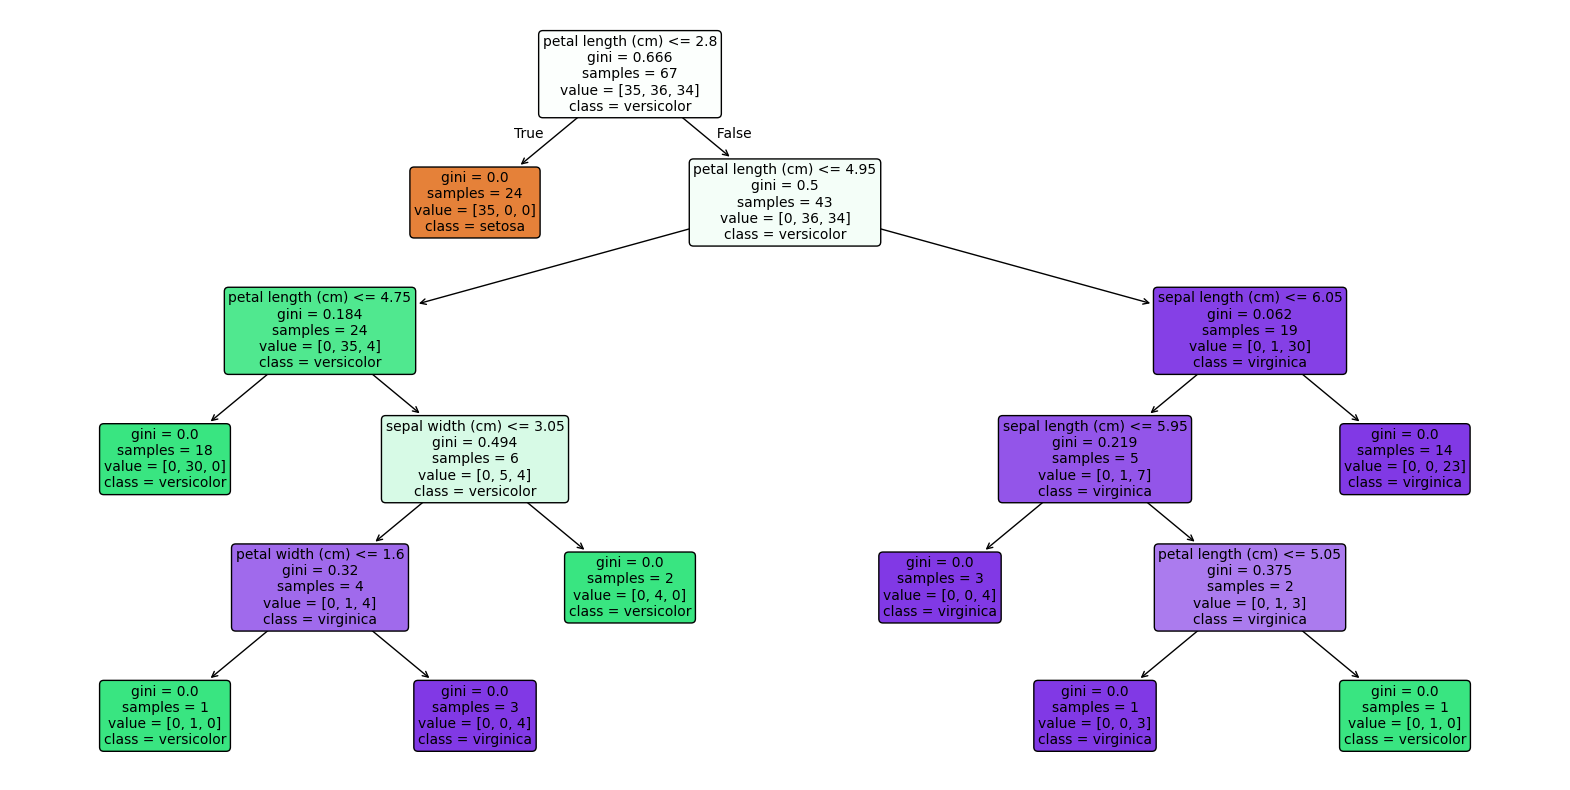

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 绘制第一个决策树
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()


Python中想要评估模型效果的话scikit-learn也提供了不同问题的评估指标接口。

Scikit-learn（简称sklearn）是一个非常强大的机器学习库，提供了很多用于分类、回归和聚类的评估指标函数。以下是常用的一些函数：

分类问题常用函数：

    accuracy_score: 输入参数包括y_true（真实标签）和y_pred（预测标签）。输出参数为准确率，即预测正确的样本数占总样本数的比例。它的作用是评估分类器的准确率，通过比较真实标签和预测标签的一致性来计算准确率。
    confusion_matrix: 输入参数包括y_true（真实标签）和y_pred（预测标签）。输出参数为混淆矩阵，展示各类别之间的预测和实际分类情况。它的作用是评估分类器的性能，通过比较真实标签和预测标签的分类情况来生成混淆矩阵，以量化分类器的正确率、精度、召回率和F1分数等指标。
    classification_report: 输入参数包括y_true（真实标签）和y_pred（预测标签）。输出参数为分类报告，包括精确度、召回率和F1分数等分类性能指标。它的作用是提供详细的分类性能评估报告，通过比较真实标签和预测标签的分类情况来计算各类别的精确度、召回率和F1分数，以全面评估分类器的性能。
    roc_auc_score: 输入参数包括y_true（真实标签）和y_pred（预测概率）。输出参数为ROC曲线下的面积，用于评估二元分类器的性能。它的作用是通过计算ROC曲线下的面积来评估分类器的性能，ROC曲线展示了不同分类阈值下真正例率（TPR）和假正例率（FPR）的变化情况，AUC值越大表示分类器性能越好。
    average_precision_score: 输入参数包括y_true（真实标签）和y_score（预测分数）。输出参数为平均精度，用于评估二元分类器的性能。它的作用是计算在不同分类阈值下的平均精度，综合考虑了真正例率（TPR）和假正例率（FPR），以更全面地评估分类器的性能。
    brier_score_loss: 输入参数包括y_true（真实标签）和y_prob（预测概率）。输出参数为Brier分数，用于评估二元或多元分类器的性能。它的作用是计算Brier分数，通过比较真实标签和预测概率的差异来评估分类器的性能。Brier分数越小表示预测概率与真实标签越接近，分类器性能越好。
    f1_score: 输入参数包括y_true（真实标签）和y_pred（预测标签）。输出参数为F1分数，用于评估分类器的性能。它的作用是计算F1分数，综合考虑了精确度和召回率，以更全面地评估分类器的性能。F1分数越高表示分类器性能越好。

回归问题常用函数：

mean_squared_error: 输入参数包括y_true（真实值）和y_pred（预测值）。输出参数为均方误差，即预测值与真实值差的平方的平均值。它的作用是衡量回归模型的预测误差，通过比较预测值和真实值之间的差异来评估模型的性能。

    mean_absolute_error: 输入参数包括y_true（真实值）和y_pred（预测值）。输出参数为平均绝对误差，即预测值与真实值差的绝对值的平均值。它的作用是衡量回归模型的预测误差，通过比较预测值和真实值之间的差异来评估模型的性能。
    median_absolute_error: 输入参数包括y_true（真实值）和y_pred（预测值）。输出参数为中位数绝对误差，即预测值与真实值差的中位数绝对值。它的作用是衡量回归模型的预测误差，通过比较预测值和真实值之间的差异来评估模型的性能。
    r2_score: 输入参数包括y_true（真实值）和y_pred（预测值）。输出参数为R平方值，衡量回归模型的拟合优度。它的作用是通过计算R平方值来评估模型对数据的拟合程度，R平方值越接近于1表示模型拟合越好。
    explained_variance_score: 输入参数包括y_true（真实值）和y_pred（预测值）。输出参数为解释方差，衡量模型对数据的解释程度。它的作用是通过计算解释方差来评估模型对数据的解释能力，解释方差越接近于1表示模型对数据的解释程度越高。

聚类问题常用函数：

    adjusted_mutual_info_score: 输入参数包括y_true（真实标签）和y_pred（预测标签）。输出参数为调整后的互信息分数，用于评估聚类结果的纯度。它的作用是通过计算调整后的互信息分数来评估聚类结果的纯度，该分数综合考虑了真实标签和预测标签的相似性和不相似性，以更准确地评估聚类效果。
    adjusted_rand_score: 输入参数包括y_true（真实标签）和y_pred（预测标签）。输出参数为调整后的Rand指数，衡量聚类结果的相似度。它的作用是通过计算调整后的Rand指数来评估聚类结果的相似度，该指数考虑了聚类结果的排序和类别分配情况，以更准确地评估聚类效果。
    homogeneity_score: 输入参数包括y_true（真实标签）和y_pred（预测标签）。输出参数为同质性分数，衡量聚类结果中每个簇的纯度。它的作用是通过计算同质性分数来评估聚类结果中每个簇的纯度，该分数越高表示每个簇的样本越集中于某个类别，聚类效果越好。
    completeness_score: 输入参数包括y_true（真实标签）和y_pred（预测标签）。输出参数为完整性分数，衡量聚类结果中每个样本被正确分配到其真实类别的情况。它的作用是通过计算完整性分数来评估聚类结果中每个样本被正确分配到其真实类别的情况，该分数越高表示聚类效果越好。
    v-measure: 输入参数包括y_true（真实标签）和y_pred（预测标签）。输出参数为V-measure分数，是调和平均数，结合了同质性和完整性两个方面。它的作用是通过计算V-measure分数来综合评估聚类结果的同质性和完整性，该分数越高表示聚类效果越好。
    silhouette_score: 输入参数包括y_true（真实标签）和y_pred（预测标签），samplewise（是否按样本计算）。输出参数为轮廓系数，衡量聚类效果的指标，值越接近1表示聚类效果越好。它的作用是通过计算轮廓系数来评估聚类效果的指标，该系数越高表示聚类效果越好。
    calinski-harabasz: 输入参数包括data（数据集），labels（标签）。输出参数为卡林斯基-哈拉巴兹指数，衡量聚类效果的一个指标，值越大表示聚类效果越好。它的作用是通过计算卡林斯基-哈拉巴兹指数来评估聚类效果，该指数越高表示聚类效果越好。
    davies-bouldin: 输入参数包括data（数据集），labels（标签）。输出参数为Davies-Bouldin指数，衡量聚类效果的一个指标，值越小表示聚类效果越好。它的作用是通过计算Davies-Bouldin指数来评估聚类效果，该指数越小表示聚类效果越好。
    contingency_matrix: 输入参数包括data1（第一个数据集），data2（第二个数据集），。输出参数为一个稀疏矩阵，表示每个样本的标签在真实标签和预测标签中的分布情况。它的作用是计算条件矩阽矩阵，以展示两个数据集之间的标签分布情况。

以上这些函数都是sklearn库中常用的评估指标函数，可以用来评估分类、回归和聚类等机器学习任务的性能。在使用这些函数时，需要提供真实标签和预测标签作为输入参数，并返回相应的评估结果。需要注意的是，不同的任务和数据集可能需要使用不同的评估指标来衡量模型的性能，因此在使用时需要根据具体情况选择合适的评估指标。